## Project: Analyzing the trends of COVID-19 with Python





# Problem Statement:

Given data about COVID-19 patients, write code to visualize the impact and
 analyze the trend of rate of infection and recovery as well as make predictions
 about the number of cases expected a week in future based on the current
 trends.

 # Dataset:

 CSV and Excel files containing data about the number of COVID-19 confirmed
 deaths and recovered patients both around the world and in India. Download Link

# Guidlines:

 - Usepandas to accumulate data from multiple data files.
 - Useplotly (visualization library) to create interactive visualizations.
 - UseFacebook prophet library to make time series models.
 - Visualize the prediction by combining these technologies.

So, Basically we have to find ❎
1. visualize the impact of infection.
2. Analyze the trend, rate of infection.
3. analyze the recovery of cases.
4. prediction of next week cases.

In [44]:
# import libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')

In [46]:
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [47]:
df.shape

(49068, 10)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [49]:
# renaming the correct columns
df.rename(columns={'Province/State': 'State',
                   'Country/Region':'Country'}, inplace = True)
df.head()

State      Country       Lat       Long        Date  Confirmed  Deaths  \
0   NaN  Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300  2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600  2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800  2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900  2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [50]:
# getting value of count field
df.Date.value_counts()

Date
2020-01-22    261
2020-01-23    261
2020-01-24    261
2020-01-25    261
2020-01-26    261
             ... 
2020-07-23    261
2020-07-24    261
2020-07-25    261
2020-07-26    261
2020-07-27    261
Name: count, Length: 188, dtype: int64

In [51]:
# we can see max date is 2020-07-27
df['Date'].max()

'2020-07-27'

In [52]:
#populating rows with max date in top
top = df[df['Date'] == '2020-07-27']
top

State                Country        Lat       Long        Date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

# 1.  visualize the impact of infection Country wise.

In [53]:
# grouping the data country wise
df_world = top.groupby(by = 'Country')[['Confirmed', 'Deaths', 'Recovered','Active']].sum().reset_index()
df_world

Country  Confirmed  Deaths  Recovered  Active
0           Afghanistan      36263    1269      25198    9796
1               Albania       4880     144       2745    1991
2               Algeria      27973    1163      18837    7973
3               Andorra        907      52        803      52
4                Angola        950      41        242     667
..                  ...        ...     ...        ...     ...
182  West Bank and Gaza      10621      78       3752    6791
183      Western Sahara         10       1          8       1
184               Yemen       1691     483        833     375
185              Zambia       4552     140       2815    1597
186            Zimbabwe       2704      36        542    2126

[187 rows x 5 columns]

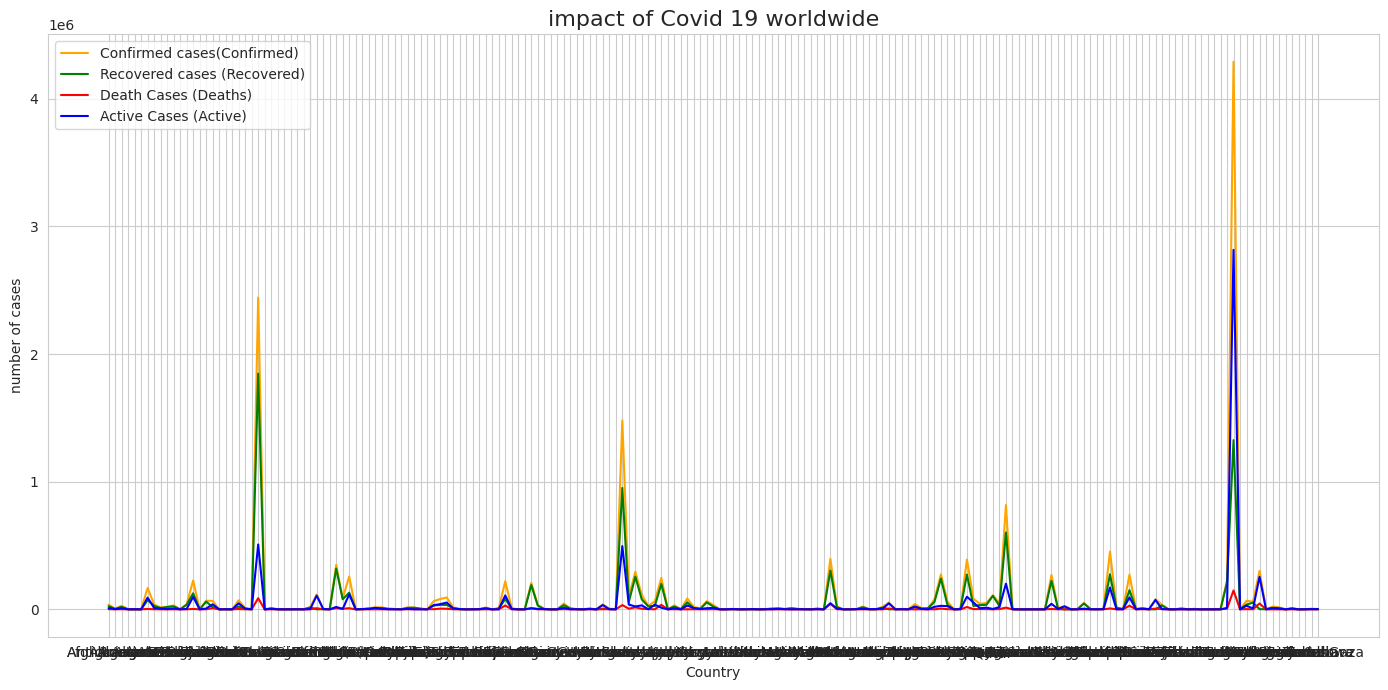

In [54]:
# Visualization
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# line graph
plt.plot(df_world['Country'], df_world['Confirmed'], label='Confirmed cases(Confirmed)', color='orange')
plt.plot(df_world['Country'], df_world['Recovered'], label='Recovered cases (Recovered)', color='green')
plt.plot(df_world['Country'], df_world['Deaths'], label='Death Cases (Deaths)', color='red')
plt.plot(df_world['Country'], df_world['Active'], label='Active Cases (Active)', color='blue')

# plot the graph
plt.title('impact of Covid 19 worldwide', fontsize=16)
plt.xlabel('Country')
plt.ylabel('number of cases')
plt.legend()
plt.tight_layout()
plt.show()

# 1. visualize the impact of infection with Time.

In [55]:
df['Date'] = pd.to_datetime(df['Date'])

In [56]:
# add all data globlize
df_global = df.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

In [57]:
df_global

Date  Confirmed  Deaths  Recovered
0   2020-01-22        555      17         28
1   2020-01-23        654      18         30
2   2020-01-24        941      26         36
3   2020-01-25       1434      42         39
4   2020-01-26       2118      56         52
..         ...        ...     ...        ...
183 2020-07-23   15510481  633506    8710969
184 2020-07-24   15791645  639650    8939705
185 2020-07-25   16047190  644517    9158743
186 2020-07-26   16251796  648621    9293464
187 2020-07-27   16480485  654036    9468087

[188 rows x 4 columns]

In [58]:
# Active cases
df_global['Active'] = df_global['Confirmed'] - df_global['Deaths'] - df_global['Recovered']
df_global['Active']

0          510
1          606
2          879
3         1353
4         2010
        ...   
183    6166006
184    6212290
185    6243930
186    6309711
187    6358362
Name: Active, Length: 188, dtype: int64

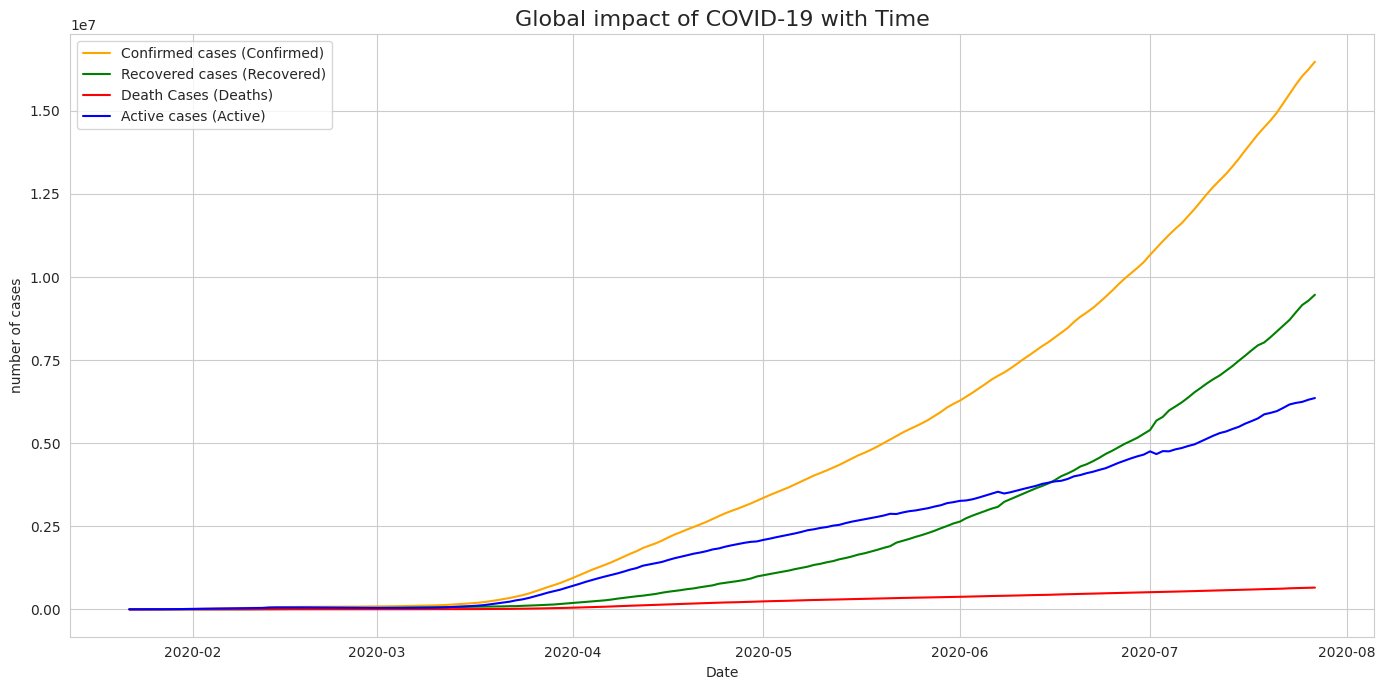

In [59]:
# Visualization
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# line graph
plt.plot(df_global['Date'], df_global['Confirmed'], label='Confirmed cases (Confirmed)', color='orange')
plt.plot(df_global['Date'], df_global['Recovered'], label='Recovered cases (Recovered)', color='green')
plt.plot(df_global['Date'], df_global['Deaths'], label='Death Cases (Deaths)', color='red')
plt.plot(df_global['Date'], df_global['Active'], label='Active cases (Active)', color='blue')

# plot the graph
plt.title('Global impact of COVID-19 with Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('number of cases')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Analyze the trend rate of infection worldwide

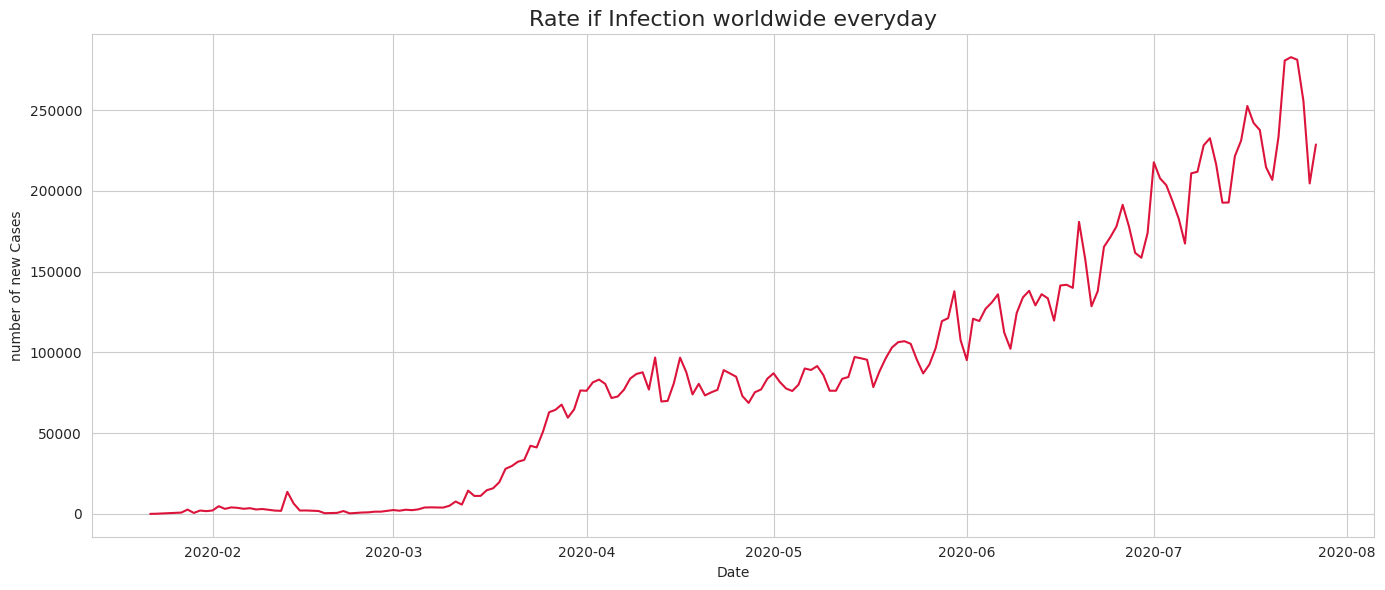

In [62]:
# data of the world
df_global = df.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# cases of each day
df_global['New_Cases'] = df_global['Confirmed'].diff().fillna(0)

# Visualization
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
plt.plot(df_global['Date'], df_global['New_Cases'], color='crimson')

plt.title("Rate if Infection worldwide everyday", fontsize=16)
plt.xlabel("Date")
plt.ylabel("number of new Cases")
plt.tight_layout()
plt.show()


# 3. analyze the recovery of cases.

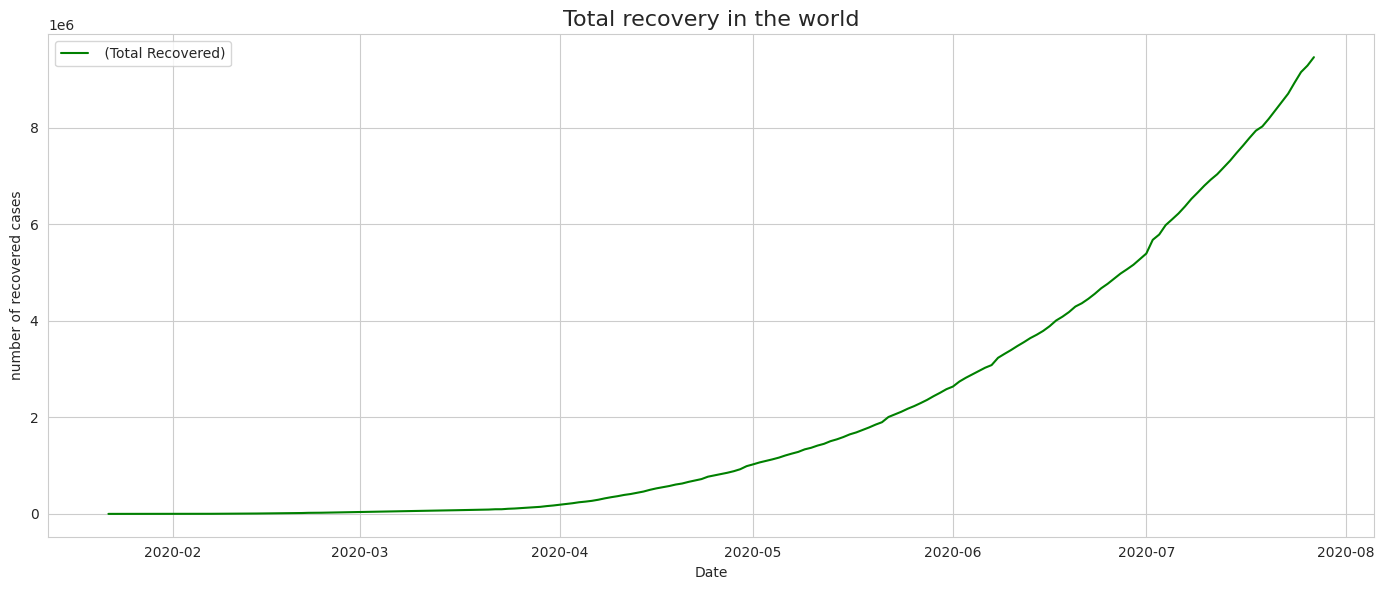

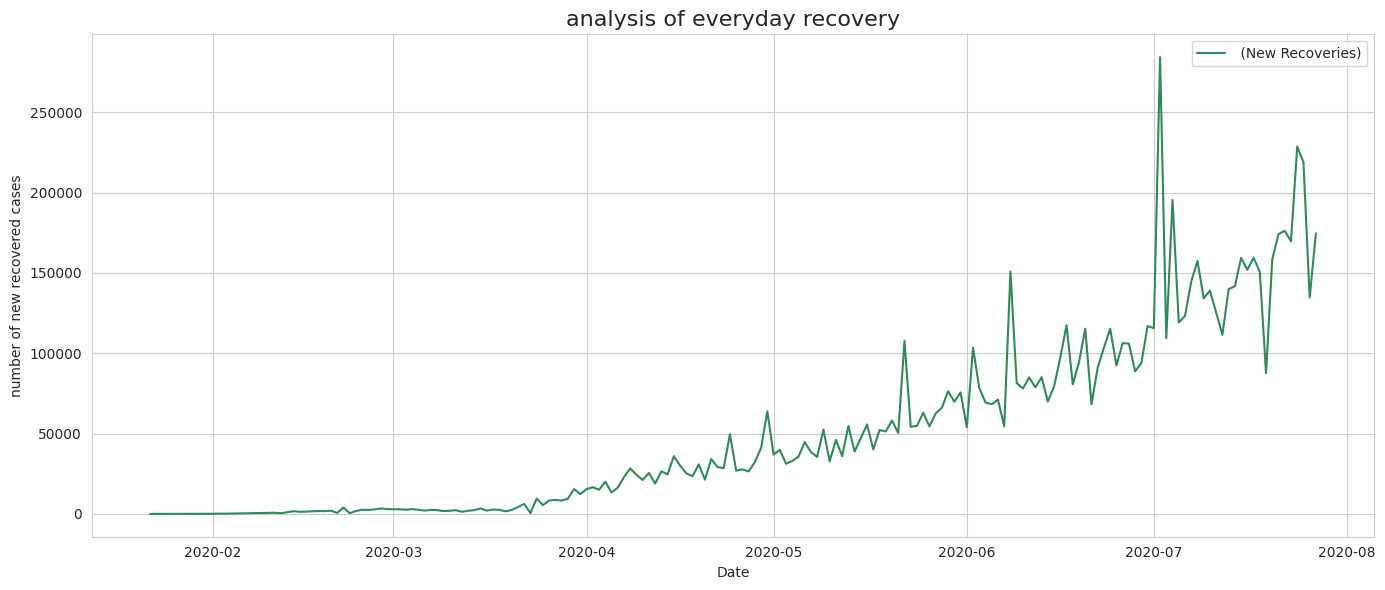

In [64]:
df_global = df.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# recovered cases each day
df_global['New_Recoveries'] = df_global['Recovered'].diff().fillna(0)

# Visualization of total recovery
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
plt.plot(df_global['Date'], df_global['Recovered'], label=' (Total Recovered)', color='green')
plt.title("Total recovery in the world", fontsize=16)
plt.xlabel("Date")
plt.ylabel("number of recovered cases")
plt.legend()
plt.tight_layout()
plt.show()

# Visualization - new recovered cases
plt.figure(figsize=(14, 6))
plt.plot(df_global['Date'], df_global['New_Recoveries'], label=' (New Recoveries)', color='seagreen')
plt.title("analysis of everyday recovery", fontsize=16)
plt.xlabel("Date")
plt.ylabel("number of new recovered cases")
plt.legend()
plt.tight_layout()
plt.show()


# 4. prediction of next week cases.

📅 2020-07-28 → predicted cases: 12,132,746
📅 2020-07-29 → predicted cases: 12,214,500
📅 2020-07-30 → predicted cases: 12,296,255
📅 2020-07-31 → predicted cases: 12,378,009
📅 2020-08-01 → predicted cases: 12,459,763
📅 2020-08-02 → predicted cases: 12,541,518
📅 2020-08-03 → predicted cases: 12,623,272


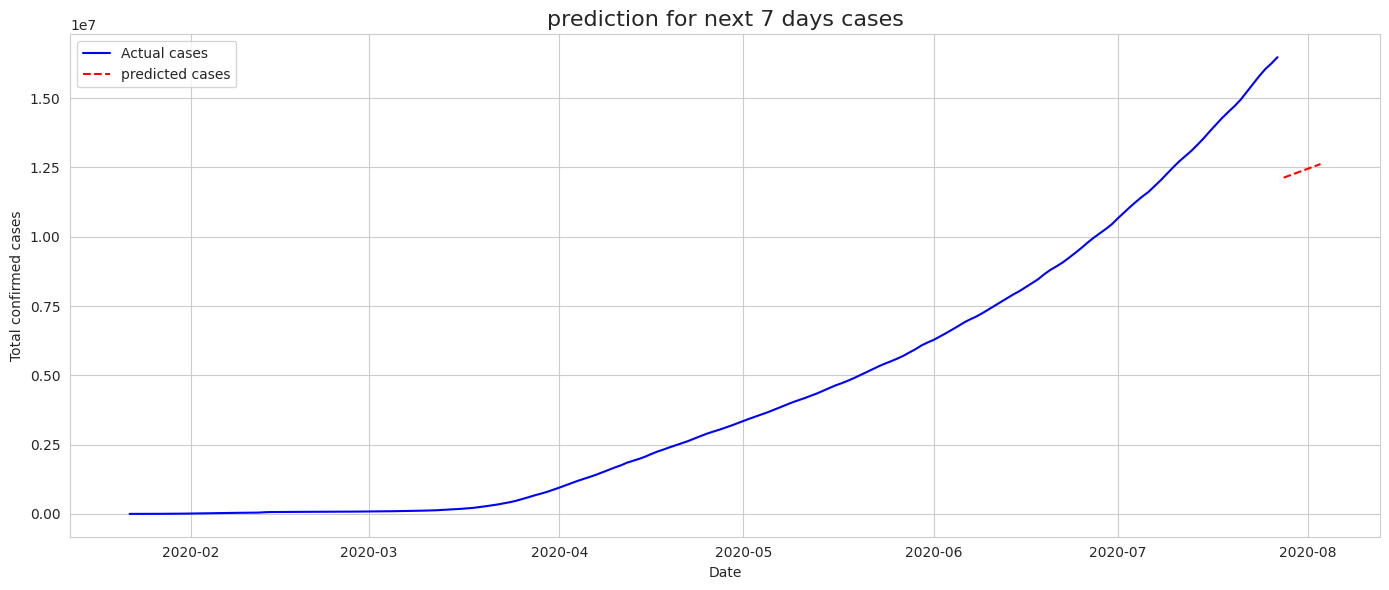

In [68]:

from sklearn.linear_model import LinearRegression
from datetime import timedelta

# only Confirmed cases
df_global = df.groupby('Date')['Confirmed'].sum().reset_index()


df_global['Days_Since'] = (df_global['Date'] - df_global['Date'].min()).dt.days


X = df_global[['Days_Since']]
y = df_global['Confirmed']

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# next 7 days
last_day = df_global['Days_Since'].max()
future_days = np.array([last_day + i for i in range(1, 8)]).reshape(-1, 1)

# prediction
future_preds = model.predict(future_days)


future_dates = [df_global['Date'].max() + timedelta(days=i) for i in range(1, 8)]


for date, pred in zip(future_dates, future_preds):
    print(f"📅 {date.strftime('%Y-%m-%d')} → predicted cases: {int(pred):,}")

# Visualization
plt.figure(figsize=(14, 6))
plt.plot(df_global['Date'], df_global['Confirmed'], label="Actual cases", color='blue')
plt.plot(future_dates, future_preds, label="predicted cases", color='red', linestyle='--')
plt.title("prediction for next 7 days cases", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total confirmed cases")
plt.legend()
plt.tight_layout()
plt.show()
